In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

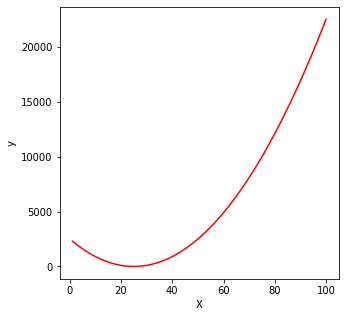

In [12]:
TRUE_W = 2
TRUE_B = -50
X = np.arange(start = 1, stop = 101, step = 1, dtype = np.float32)
y = (X * TRUE_W + TRUE_B) ** 2
plt.figure(figsize=(5,5))
plt.xlabel("X")
plt.ylabel("y")
plt.plot(X,y,color = 'r')

In [47]:
# Normalization of data
X = (X - np.min(X)) / (np.max(X) - np.min(X))
y = (y - np.min(y)) / (np.max(y) - np.min(y))


In [48]:
TRAIN_PORTION = int(0.8 * len(X))
X_train = X[:TRAIN_PORTION]
y_train = y[:TRAIN_PORTION]
X_test = X[TRAIN_PORTION:]
X_test = X[TRAIN_PORTION:]

In [72]:
tf.random.set_seed(42)
model = keras.Sequential([
    keras.layers.Dense(1, input_shape = [1]),
    keras.layers.Dense(10,activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid'),
    keras.layers.Dense(3, activation='sigmoid'),
    keras.layers.Dense(1)
])

model.compile(loss=keras.losses.mae,
              optimizer = keras.optimizers.Adam(learning_rate=0.1),
              metrics = ['mae'])
model.fit(X, y, epochs=150)


Epoch 1/150
4/4 [==============================] - 1s 3ms/step - loss: 0.3133 - mae: 0.3133
Epoch 2/150
4/4 [==============================] - 0s 5ms/step - loss: 0.3598 - mae: 0.3598
Epoch 3/150
4/4 [==============================] - 0s 5ms/step - loss: 0.2349 - mae: 0.2349
Epoch 4/150
4/4 [==============================] - 0s 3ms/step - loss: 0.2363 - mae: 0.2363
Epoch 5/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2337 - mae: 0.2337
Epoch 6/150
4/4 [==============================] - 0s 3ms/step - loss: 0.2320 - mae: 0.2320
Epoch 7/150
4/4 [==============================] - 0s 5ms/step - loss: 0.2289 - mae: 0.2289
Epoch 8/150
4/4 [==============================] - 0s 4ms/step - loss: 0.2324 - mae: 0.2324
Epoch 9/150
4/4 [==============================] - 0s 3ms/step - loss: 0.2295 - mae: 0.2295
Epoch 10/150
4/4 [==============================] - 0s 33ms/step - loss: 0.2266 - mae: 0.2266
Epoch 11/150
4/4 [==============================] - 0s 7ms/step - loss: 0.2234

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_58 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_59 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_60 (Dense)             (None, 3)                 33        
_________________________________________________________________
dense_61 (Dense)             (None, 1)                 4         
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________


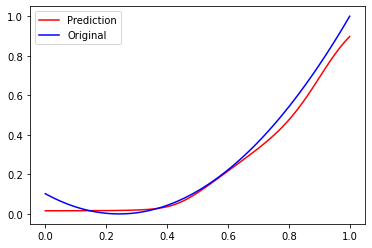

In [73]:
model.summary()
y_pred = model.predict(X)
plt.plot(X,y_pred,color = "red",label = "Prediction")
plt.plot(X,y,color = "blue", label = "Original")
plt.legend()

In [78]:
from tensorflow.keras.utils import plot_model
plot_model(model)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')
